In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm 

%matplotlib inline


In [17]:
df=pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-10,162.820007,163.220001,161.179993,161.339996,159.648727,20725900
1,2020-01-13,161.759995,163.309998,161.259995,163.279999,161.568405,21626500
2,2020-01-14,163.389999,163.600006,161.720001,162.130005,160.430450,23477400
3,2020-01-15,162.619995,163.940002,162.570007,163.179993,161.469452,21417900
4,2020-01-16,164.350006,166.240005,164.029999,166.169998,164.428116,23865400


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.941933e+02,2.277012e+01,1.370100e+02,1.766200e+02,2.026500e+02,2.135225e+02,2.292700e+02
High,252.0,1.967783e+02,2.224673e+01,1.405700e+02,1.789375e+02,2.045550e+02,2.153125e+02,2.328600e+02
Low,252.0,1.916249e+02,2.301490e+01,1.325200e+02,1.747450e+02,1.999950e+02,2.109300e+02,2.273500e+02
Close,252.0,1.942989e+02,2.267934e+01,1.354200e+02,1.783000e+02,2.026000e+02,2.132675e+02,2.316500e+02
Adj Close,252.0,1.933907e+02,2.305360e+01,1.343665e+02,1.769129e+02,2.019762e+02,2.126219e+02,2.310451e+02
Volume,252.0,3.786005e+07,1.683367e+07,1.055060e+07,2.642552e+07,3.309325e+07,4.391550e+07,9.707360e+07


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [20]:
df['Date']=pd.to_datetime(df['Date'],format="mixed",dayfirst=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [22]:
df['LogReturn']=np.log(df['Close'])-np.log(df['Close']).shift(1)
df['LogReturn']

0           NaN
1      0.011953
2     -0.007068
3      0.006455
4      0.018158
         ...   
247   -0.021495
248    0.000964
249   -0.026271
250    0.028060
251    0.006074
Name: LogReturn, Length: 252, dtype: float64

In [23]:
mu=df['LogReturn'].mean()
mu

0.0012286248712609787

In [24]:
sigma=df['LogReturn'].std()
sigma

0.027902837306767212

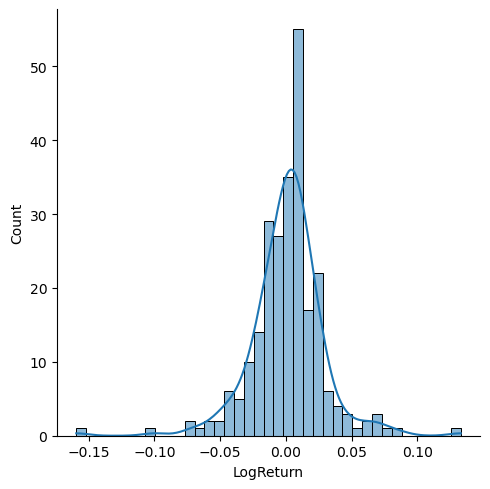

In [25]:
sns.displot(data=df['LogReturn'],kde=True)

In [26]:
density=pd.DataFrame()

In [27]:
df['LogReturn'].shape

(252,)

0     -0.159453
1     -0.158453
2     -0.157453
3     -0.156453
4     -0.155453
         ...   
288    0.128547
289    0.129547
290    0.130547
291    0.131547
292    0.132547
Name: x, Length: 293, dtype: float64


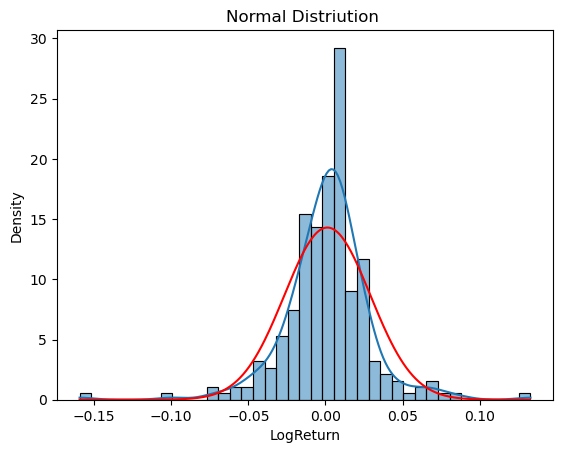

In [28]:
density['x'] = np.arange(df['LogReturn'].min(), df['LogReturn'].max(), 0.001)
#ensity['x']=np.arange(df['LogReturn'].min(),df['LogReturn'].max(),100)
print(density['x'])
density['pdf']=norm.pdf(density['x'],mu,sigma)
density['pdf']
fig,ax=plt.subplots()
sns.histplot(data=df['LogReturn'],kde=True,ax=ax,stat="density")
ax.plot(density['x'],density['pdf'],color="red")
plt.title("Normal Distriution ")
plt.show()

What is the probability that the stock price will drop over 5% in a day?

In [37]:
norm.cdf(-0.05,mu,sigma)

0.033181437344865984

What is the probability that the stock price will drop over 10% in a day?

In [38]:
norm.cdf(-0.10,mu,sigma)

0.0001428695000257634

 What is the probability that the stock price will drop over 50% in a year?

In [39]:
sigmaYearly=sigma*np.sqrt(250)
sigmaYearly

0.4411825953525139

In [41]:
muyearly=mu*250
muyearly

0.30715621781524466

In [42]:
norm.cdf(-0.50,muyearly,sigmaYearly)

0.03366022235185039

What is the probability that the stock price will drop over 25% in a year?

In [43]:
norm.cdf(-0.25,muyearly,sigmaYearly)

0.10331797034715662

 What is the 50th percentile of the yearly stock price?

In [44]:
zscore=norm.ppf(0.50,loc=muyearly,scale=sigmaYearly)
zscore

0.30715621781524466